In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#打开交互模式
%matplotlib notebook 
from matplotlib.animation import FuncAnimation

# easy example

In [23]:
# asin(x,a) = a*sin(x/a)
def asin(x,a): # x is a list
    return np.sin(x/a)*a

def linear(x,a):
    return a*x*10

#用来连续变化的参数a
step = 0.01
steps = np.arange(0,2,step) # a 的取值
#list x,横坐标
x = np.linspace(-5,5,1000)

<IPython.core.display.Javascript object>


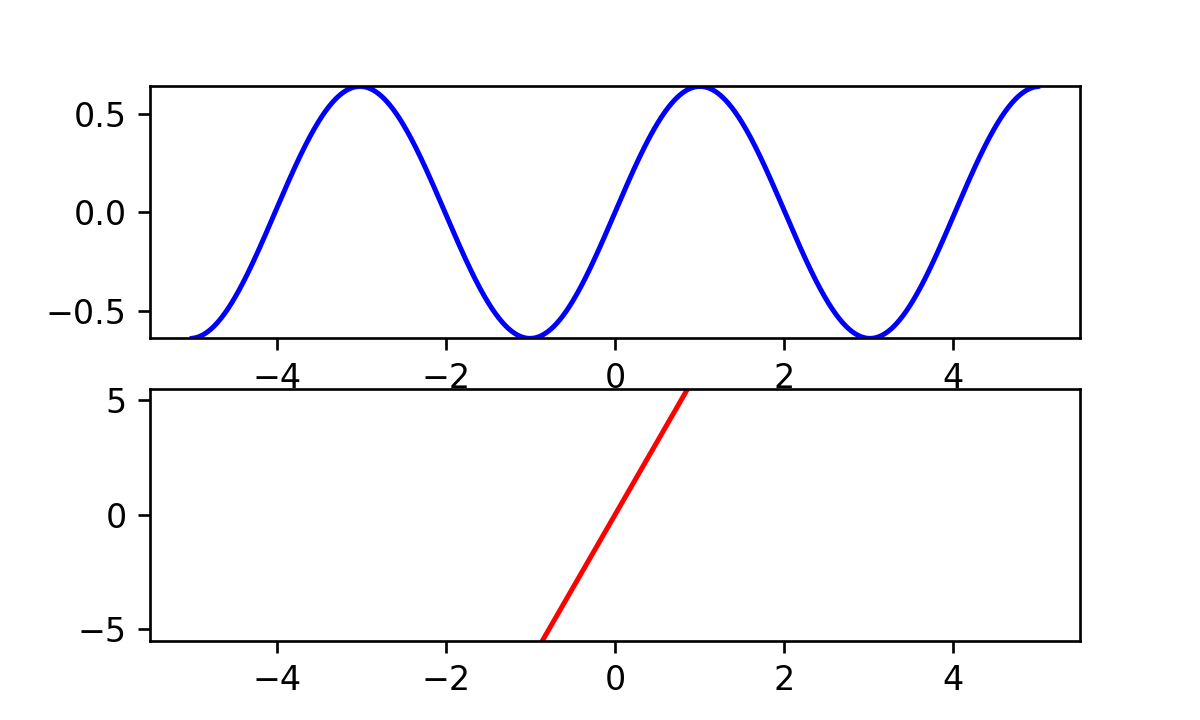

In [25]:
# create figure and axes 
fig, (ax1, ax2) = plt.subplots(2, figsize=(5,3)) #figure看成总名称，ax1是第一个subplot的句柄

#上面这句话等价于下面三句
# fig = plt.figure(figsize=(5,3))
# ax1 = fig.add_subplot(211)
# ax2 = fig.add_subplot(212)


# creating our line objects for the plots
#随便画什么都可以
line1, = ax1.plot(x, x, '-b') #line1是一个Line2D的object,看成是要画的那个曲线，有x,y坐标
line2, = ax2.plot(x, x, '-r')

def animate(B):
    """
    这个函数的目的是告诉FuncAnimation每次图形应该怎么变化
    this function gets called by FuncAnimation
    each time called, it will replot with a different width "B"
    
    B: 就是上面的sin和linear每次输入的a(每次输入的a都不一样)
    
    return:
        sinc: ydata
        box: ydata
    """
    
    #每次都要更新line1和line2
    #每次画图时候都是在line1这个曲线上面改变，改变的是它的y值
    line1.set_ydata(asin(x,B))
    line2.set_ydata(linear(x,B))
    
#     adjust the sinc plot height in a loop
    ax1.set_ylim(np.min(asin(x,B)), np.max(asin(x,B)))
    
    # format the ax1 yticks
#     plt.setp(ax1, xticks=[-0.25, 0.25], xticklabels=['-1/4', '1/4'],
#              yticks=[0, np.max(F)], yticklabels=['0', 'B={:.2f}'.format((B / length))])
    
#     # format the ax2 xticks to move with the box
#     plt.setp(ax2, yticks=[0, 1], 
#              xticks=[-1, -1 * B / length, 1 * B / length, 1], xticklabels=['-1', '-B/2', 'B/2', '1'])
    
def init():
    """
    initialize the figure
    """
    return line1,line2 #画图时候实际上是对line1和line2进行更改

# the FuncAnimation function iterates through our animate function using the steps array
#steps是每次输入animate的参数，interval单位是ms
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)
plt.show()

# 画图的一种实现

这个与动画无关

<IPython.core.display.Javascript object>


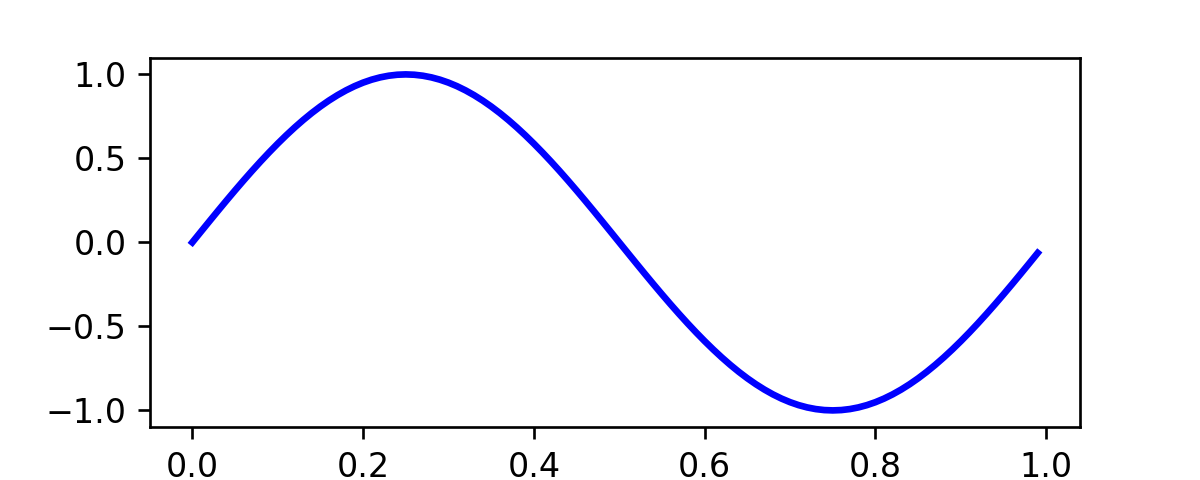

In [70]:
fig = plt.figure(figsize=(5,2))#要画图了
ax1 = fig.add_subplot(111)#加入第一个subplot
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line,  = ax1.plot(t, s, color='blue', lw=2)#line 是一个LinearD的object